In [1]:
!git clone https://gitlab.com/IOTGarage/camtrapbench

Cloning into 'camtrapbench'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 199 (delta 27), reused 0 (delta 0), pack-reused 36
Receiving objects: 100% (199/199), 45.27 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [4]:
# Requrired imports
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

'''
#Needed if using colab
import os
os.chdir('/content/camtrapbench')
'''

### Reading the csv files for tested models:

In [ ]:
# Ground truth of the dataset tested:
output_df = pd.read_csv('class_labels.csv')

mega_df = pd.read_csv('csv/mega_det.csv')
marco_df = pd.read_csv('csv/marco.csv')
marco_s_df= pd.read_csv('csv/marco_sub.csv')
evol_p1_df = pd.read_csv('csv/evloving_ai_phase-1.csv', header=None)
evol_p2_df = pd.read_csv('csv/evloving_ai_phase-2.csv', header=None)

#if you want to use google please follow the guidelines, create .json keys and run the model first
#google_df = '' 

'''
#Your custom model here ##
custom_df = pd.read_csv('')
'''

### Add function to convert labels 

In [ ]:
'''
def custom_model(img_name):
  val = 0
  ###
  code to convert output for img_name to the following format 0=animal, 1 = human, 2 = empty
  val = {0,1,2}
  ###
  return val
'''

'\ndef custom_model(img_name):\n  val = 0\n  ###\n  code to convert output for img_name to the following format 0=animal, 1 = human, 2 = empty\n  val = {0,1,2}\n  ###\n  return val\n'

In [66]:
##functions to convert each model output to the required format

def mega_set_labels(img_name):
  val=2
  for index,img_path in enumerate(mega_df['data']):
    if img_name in str(img_path):
      if float(mega_df['conf'][index])>0.50:
        val=int(mega_df['category'][index][2:3])-1
  return val

def marco_set_labels(img_name):
  val = 0

  for i, img_path in enumerate(marco_df['file_name']):
    if img_name==img_path:
      if marco_df['predicted_class'][i]=='species':
        val = 0
      else:
        if marco_df['predicted_class'][i]=='blank' and marco_df['predicted_probability'][i]>0.50:
          val = 2
        else:
          val = 0
      if marco_s_df['predicted_class'][i]=='HUMAN':
          val=1
  return val

def evolve_set_lable(img_name):
  val = 0
  headers = evol_p1_df.columns.tolist()
  for index, img_path in enumerate(evol_p1_df[1]):
    if img_path in img_name:
      val = int(evol_p1_df[2][index])
  return val

def google_set_label(img_name):
  val = random.randint(0,2)
  '''
  code to set val = {0,1,2} where 0 - animals, 1 - human, 2 - empty
  '''
  return val


def evolvep2_set_label(img_name):
  val = 0
  '''
  code to set val = {0,1,2} where 0 - animals, 1 - human, 2 - empty
  '''
  for index, img_path in enumerate(evol_p2_df[1]):
    if img_name in img_path:
      if int(evol_p2_df[10][index][1:])==0:
        val=2
      elif int(evol_p2_df[10][index][1:])==1:
        val=1
      else:
        val=0

  return val

### Prepare the model's predictions: 

In [67]:
# Creating empty lists which will be used to store the prediction values of the models:
mega=[]
marco=[]
evolve=[]
google=[]
evolve2=[]
#custom_model = []
output=output_df['output'].tolist()

# Call the functions:
for i in output_df['image']:
  mega.append(mega_set_labels(i))
  marco.append(marco_set_labels(i))
  evolve.append(evolve_set_lable(i))
  google.append(google_set_label(i))
  evolve2.append(evolvep2_set_label(i))
  #custom_model.append(custom_model(i))

### Calculate accuracy for each model:

In [68]:
e1=0
for index,value in enumerate(evolve):
  if int(value)==output[index]:
    e1+=1
print('Accuracy of Evolving lab p1 = ',e1/len(output)) #iterating over the results and comparing with ground truth values

e2=0
for index,value in enumerate(evolve2):
  if value==output[index]:
    e2+=1
print('Accuracy of Evolving lab p2 = ',e2/len(output)) #iterating over the results and comparing with ground truth values

g=0
for index,value in enumerate(google):
  if value==output[index]:
    g+=1
print('Accuracy of google = ',g/len(output)) #iterating over the results and comparing with ground truth values

meg=0
for index,value in enumerate(mega):
  if value==output[index]:
    meg+=1
print('Accuracy of mega = ',meg/len(output)) #iterating over the results and comparing with ground truth values

mar=0
for index,value in enumerate(marco):
  if value==output[index]:
    mar+=1
print('Accuracy of marco= ',mar/len(output)) #iterating over the results and comparing with ground truth values


'''
custom_m=0
for index,value in enumerate(custom_model):
  if value==output[index]:
    mar+=1
print('Accuracy of the custom_model= ',custom_m/len(output)) #iterating over the results and comparing with ground truth values

'''


# Append accuracies:
acc = [e1, e2, g, meg, mar]

'''
acc = [e1, e2, g, meg, mar, custom_m]
'''

Accuracy of Evolving lab p1 =  0.59
Accuracy of Evolving lab p2 =  0.59
Accuracy of google =  0.38
Accuracy of mega =  0.82
Accuracy of marco=  0.42


### Plot accuracies:

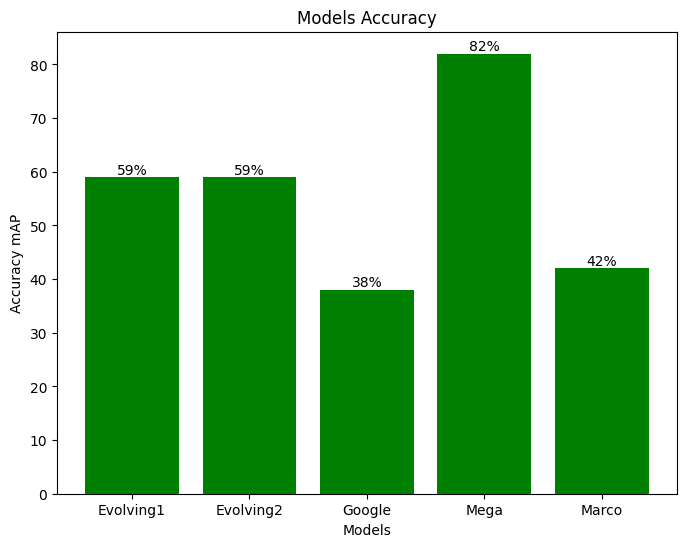

In [69]:
models = ["Evolving1", "Evolving2", "Google", "Mega", "Marco"]
plt.figure(figsize=(8,6))
bars = plt.bar(models, acc,color="green")
plt.title('Models Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy mAP')
for bar in bars:

    plt.text(bar.get_x() + bar.get_width()/2 , bar.get_height(), str(round(bar.get_height(), 2)) + "%", ha='center', va='bottom')
plt.show()

# Custom Model

In [ ]:
'''

Plot the results of your custom model here. 
Feel free to choose you type plot and graph (bar, confusion matrix...)

'''

# Marco

### 1. Animal vs Non-Animal

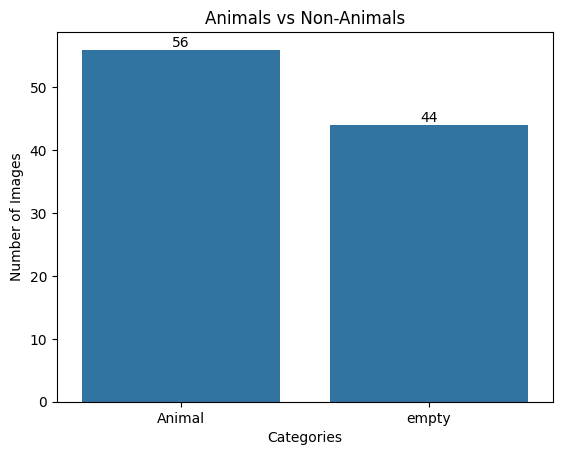

In [70]:
## Unified aniamls vs human:
marco_df.loc[marco_df['predicted_class'] == "blank", 'predicted_class'] = 'empty'
marco_df.loc[marco_df['predicted_class'] == "vehicle", 'predicted_class'] = 'empty'
marco_df.loc[marco_df['predicted_class'] == "species", 'predicted_class'] = 'Animal'
ax =sns.countplot(x='predicted_class', data=marco_df)
ax.bar_label(ax.containers[0])
plt.title('Animals vs Non-Animals')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()

### 2. Animal vs Human

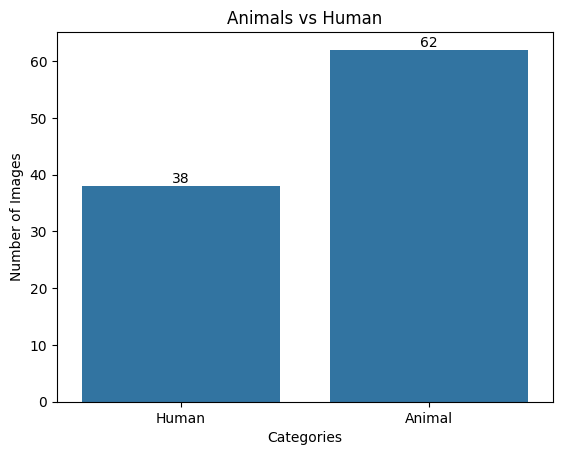

In [71]:
## Unified aniamls vs human:
marco_s_df.loc[marco_s_df['predicted_class'] == "HUMAN", 'predicted_class'] = 'Human'
marco_s_df.loc[marco_s_df['predicted_class'] != "Human", 'predicted_class'] = 'Animal'

ax =sns.countplot(x='predicted_class', data=marco_s_df)
ax.bar_label(ax.containers[0])
plt.title('Animals vs Human')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()

### 3. Animal Species

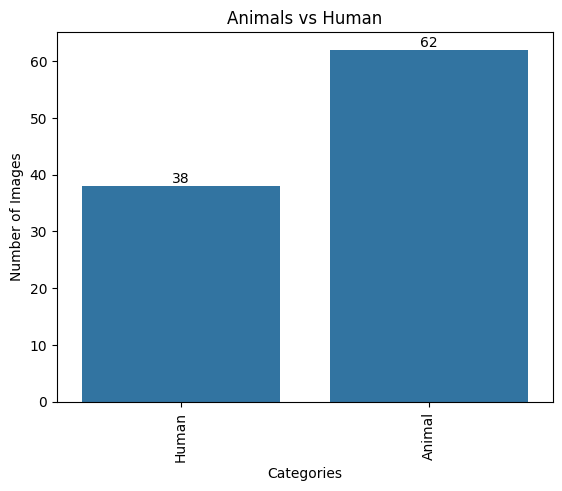

In [72]:
#marco_s_df=pd.read_csv('csv/marco_sub.csv')
marco_s_df = marco_s_df[marco_s_df['predicted_class']!='HUMAN']

ax =sns.countplot(x='predicted_class', data=marco_s_df)
ax.bar_label(ax.containers[0])
plt.title('Animals vs Human')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

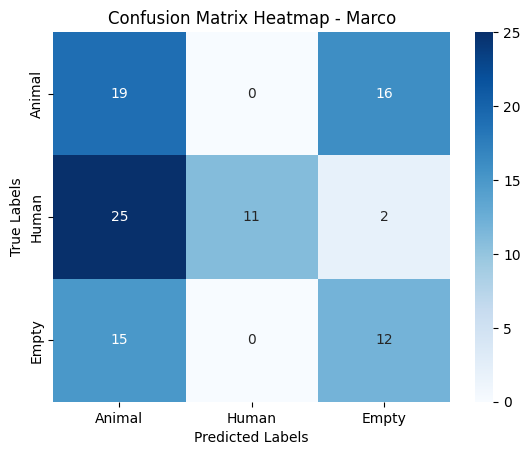

In [73]:
# Confusion-Matrix
conf_matrix_marco = confusion_matrix(marco, output)

sns.heatmap(conf_matrix_marco, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Marco')
plt.show()

# Evolving Lab AI

In [74]:
## Rename the columns
#evol_p1_df = pd.read_csv('evloving_ai_phase-1.csv', header=None)
evol_p1_df = evol_p1_df.rename(columns={1: "path", 2: "class"})
replacement_dict = {0: 'Animal', 1: 'Human', 2: "Empty", 3: "Empty", 5: "Empty"}
evol_p1_df['class'] = evol_p1_df['class'].replace(replacement_dict)

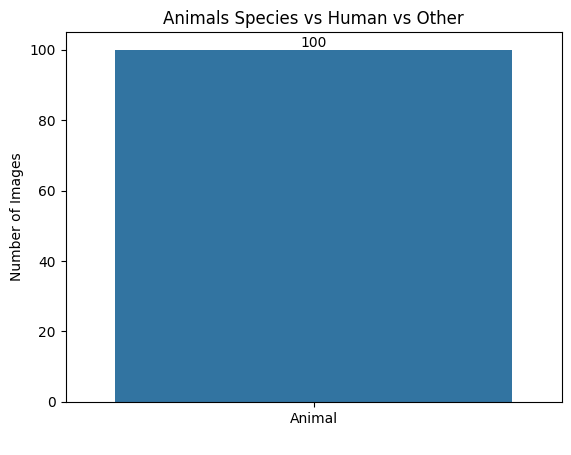

In [75]:
ax =sns.countplot(x='class', data=evol_p1_df)
ax.bar_label(ax.containers[0])
plt.title('Animals Species vs Human vs Other')
plt.xlabel(' ')
plt.ylabel('Number of Images')
plt.show()

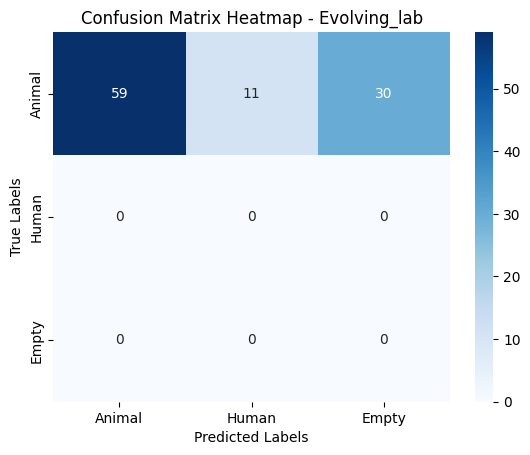

In [77]:
# Confusion-Matrix
conf_matrix_evol_p1 = confusion_matrix(evolve, output)

sns.heatmap(conf_matrix_evol_p1, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Evolving_lab')
plt.show()

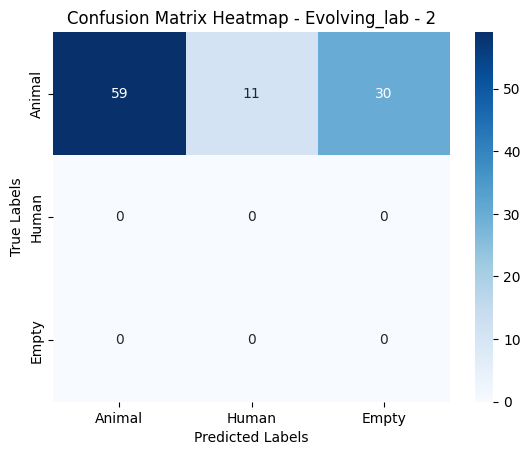

In [78]:
conf_matrix_evol_p1 = confusion_matrix(evolve2, output)

sns.heatmap(conf_matrix_evol_p1, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Evolving_lab - 2')
plt.show()

# Mega Detector

In [80]:
#replacing the values
#mega_df = pd.read_csv('mega_det.csv')
replacement_dict = {" '1'": 'Animal', " '2'": 'Human', " '3'": "Empty",}
mega_df['category'] = mega_df['category'].replace(replacement_dict)

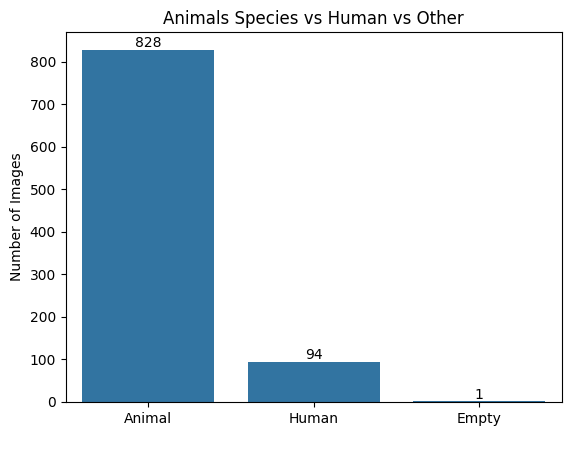

In [81]:
ax =sns.countplot(x='category', data=mega_df)
ax.bar_label(ax.containers[0])
plt.title('Animals Species vs Human vs Other')
plt.xlabel(' ')
plt.ylabel('Number of Images')
plt.show()

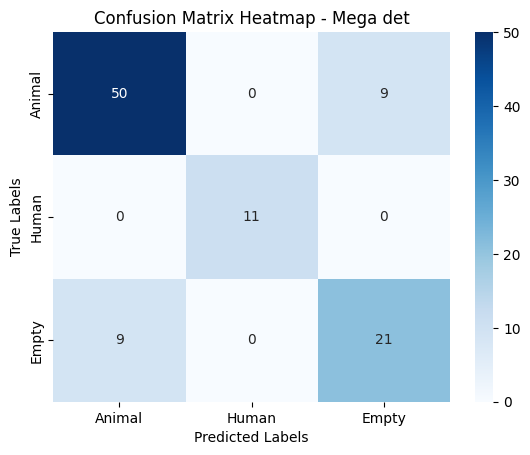

In [82]:
# Confusion-Matrix
conf_matrix_mega = confusion_matrix(mega, output)

sns.heatmap(conf_matrix_mega, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Mega det')
plt.show()

In [86]:
#converting the lists to strings so we they can be passed into argparser
my_mega = ','.join(map(str, mega))
my_google = ','.join(map(str, google))
my_marco = ','.join(map(str, marco))
my_evolve =','.join(map(str, evolve))
my_evolve2 =','.join(map(str, evolve2))
my_output =','.join(map(str, output))

# running the machine learning models

!python models_codes/dt.py --mega $my_mega --google $my_google --marco $my_marco --evolve $my_evolve --evolve2 $my_evolve2 --output $my_output --model_path 'models_weights/decision_tree_model.joblib' --output_file 'decision_tree.csv'

!python models_codes/lr.py --mega $my_mega --google $my_google --marco $my_marco --evolve $my_evolve --evolve2 $my_evolve2 --output $my_output --model_path 'models_weights/linear_regression_model.joblib' --output_file 'lr.csv'

!python models_codes/svm.py --mega $my_mega --google $my_google --marco $my_marco --evolve $my_evolve --evolve2 $my_evolve2 --output $my_output --model_path 'models_weights/svm_model.joblib' --output_file 'svm.csv'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Accuracy: 0.57
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Accuracy: 0.63
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
Accuracy: 0.57
Match ratio: 0.57


# Ensemble Learning

In [87]:
# Reading csv files from pretrained models
lr_csv = pd.read_csv('lr.csv')
dt_csv = pd.read_csv('decision_tree.csv')
svm_csv = pd.read_csv('svm.csv')


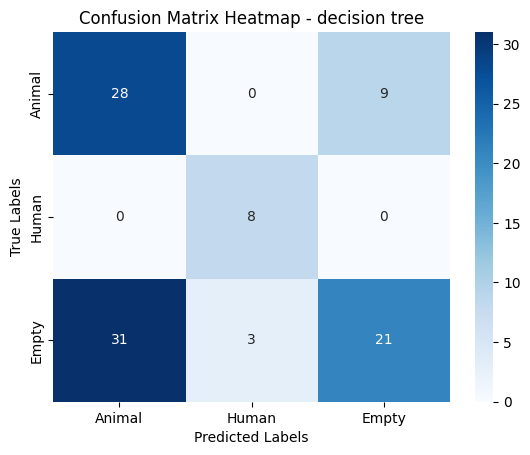

In [88]:
# Decision tree connfusion matrix
conf_matrix_mega = confusion_matrix(dt_csv['predictions'], output)

sns.heatmap(conf_matrix_mega, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - decision tree')
plt.show()

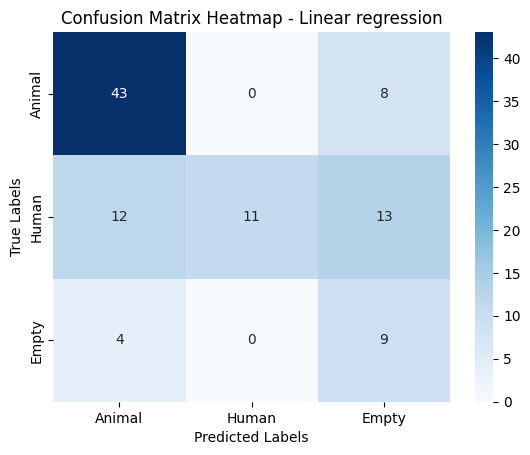

In [89]:
# Linera regression connfusion matrix
conf_matrix_mega = confusion_matrix(lr_csv['predictions'], output)

sns.heatmap(conf_matrix_mega, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Linear regression')
plt.show()

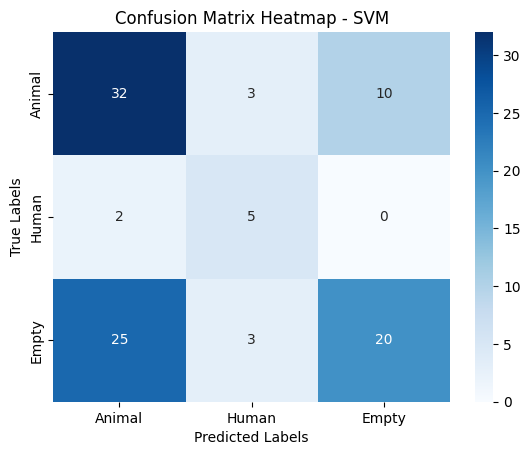

In [90]:
# SVM connfusion matrix
conf_matrix_mega = confusion_matrix(svm_csv, output)

sns.heatmap(conf_matrix_mega, annot=True, cmap='Blues', fmt='d', xticklabels=['Animal', 'Human', 'Empty'], yticklabels=['Animal', 'Human', 'Empty'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - SVM')
plt.show()